# Лабораторная работа 3

## Подготовка 

### Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn import metrics

In [7]:
import warnings

### Отключение предупреждений (FutureWarning)

In [8]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

### Загрузка датасета

In [9]:
df = pd.read_csv('filtered.csv', sep = ',', low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299386 entries, 0 to 299385
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   299386 non-null  int64  
 1   Depthm       299386 non-null  float64
 2   T_degC       299386 non-null  float64
 3   Salnty       299386 non-null  float64
 4   O2ml_L       299386 non-null  float64
 5   STheta       299386 non-null  float64
 6   O2Sat        299386 non-null  float64
 7   Oxy_µmol/Kg  299386 non-null  float64
 8   RecInd       299386 non-null  float64
 9   T_prec       299386 non-null  float64
 10  S_prec       299386 non-null  float64
 11  P_qual       299386 non-null  float64
 12  SiO3qu       299386 non-null  float64
 13  NO2q         299386 non-null  float64
 14  NO3q         299386 non-null  float64
 15  R_Depth      299386 non-null  float64
 16  R_TEMP       299386 non-null  float64
 17  R_POTEMP     299386 non-null  float64
 18  R_SALINITY   299386 non-

In [10]:
df_raw = pd.read_csv('before_normalization.csv', sep=',', low_memory = False)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299386 entries, 0 to 299385
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   299386 non-null  int64  
 1   Depthm       299386 non-null  int64  
 2   T_degC       299386 non-null  float64
 3   Salnty       299386 non-null  float64
 4   O2ml_L       299386 non-null  float64
 5   STheta       299386 non-null  float64
 6   O2Sat        299386 non-null  float64
 7   Oxy_µmol/Kg  299386 non-null  float64
 8   RecInd       299386 non-null  int64  
 9   T_prec       299386 non-null  float64
 10  S_prec       299386 non-null  float64
 11  P_qual       299386 non-null  float64
 12  Chlqua       299386 non-null  float64
 13  Phaqua       299386 non-null  float64
 14  SiO3qu       299386 non-null  float64
 15  NO2q         299386 non-null  float64
 16  NO3q         299386 non-null  float64
 17  NH3q         299386 non-null  float64
 18  C14A1q       299386 non-

### Деление на обучающие и тестовые множества

In [11]:
df['Depthm']

0         0.000000
1         0.001936
2         0.002904
3         0.003872
4         0.005808
            ...   
299381    0.048403
299382    0.058083
299383    0.077444
299384    0.096805
299385    0.000000
Name: Depthm, Length: 299386, dtype: float64

In [12]:
x = df[['Depthm','T_degC','Salnty','O2Sat']]
x_training_data, x_test_data = train_test_split(x, test_size = 0.99)

## Обучение моделей и подбор параметров

### K-Means

In [13]:
km = KMeans(n_clusters = 2)

In [14]:
km.fit(x_training_data)

KMeans(n_clusters=2)

In [15]:
km_res = km.predict(x_test_data)

In [16]:
km.cluster_centers_

array([[0.01057866, 0.44764691, 0.5048113 , 0.57717924],
       [0.08377868, 0.20655606, 0.61064853, 0.13642024]])

In [17]:
set(km.labels_)

{0, 1}

### DBSCAN

In [18]:
dbs = DBSCAN(eps = 0.05, min_samples = 50) #OPTICS(max_eps = 0.3, cluster_method = 'dbscan')

In [19]:
dbs.fit(x_training_data)

DBSCAN(eps=0.05, min_samples=50)

In [20]:
set(dbs.labels_)

{-1, 0}

### Иерархическая кластеризация

In [21]:
ag = AgglomerativeClustering()

In [22]:
ag.fit(x_training_data)

AgglomerativeClustering()

In [23]:
set(ag.labels_)

{0, 1}

## Оценка моделей

### Экспертная оценка

В результате работы алгоритмов KMeans и иерархической кластеризациии выделены кластеры, схожие с исходной классификацией датасета. "Логарифмические" скопления делят алгоритмами KMeans и иерархической кластеризации по изгибу на "горизонтальный" и "вертикальный" кластера. Алгоритм DBSCAN не выделяет отдельных кластеров. Точки с низкой плотностью помечены как шум.

### Сравнение разбиения на классы с реальным

In [24]:
classes = pd.read_csv('classes.csv', sep = ',', low_memory = False)

In [25]:
y_test = x_test_data.join(classes)['Depthm_Class']

In [26]:
y_train = x_training_data.join(classes)['Depthm_Class']#.map({1:0, 0:1})

rand = $\frac{TP + TN}{TP + TN + FP + FN}$

In [27]:
metrics.rand_score(y_test, km_res)

0.735860798633336

In [28]:
metrics.rand_score(y_train, dbs.labels_)

0.5011399147029343

In [29]:
metrics.rand_score(y_train, ag.labels_)

0.8163669774929381

jaccard = $\frac{TP + TN}{TP + TN + FN}$

In [30]:
metrics.jaccard_score(y_test, km_res)

0.7283719405850199

In [33]:
metrics.jaccard_score(y_train, (dbs.labels_ > -1))

0.4594594594594595

In [34]:
metrics.jaccard_score(y_train, ag.labels_)

0.7984189723320159

### Визуализация предсказанных значений

<Axes: xlabel='T_degC', ylabel='O2Sat'>

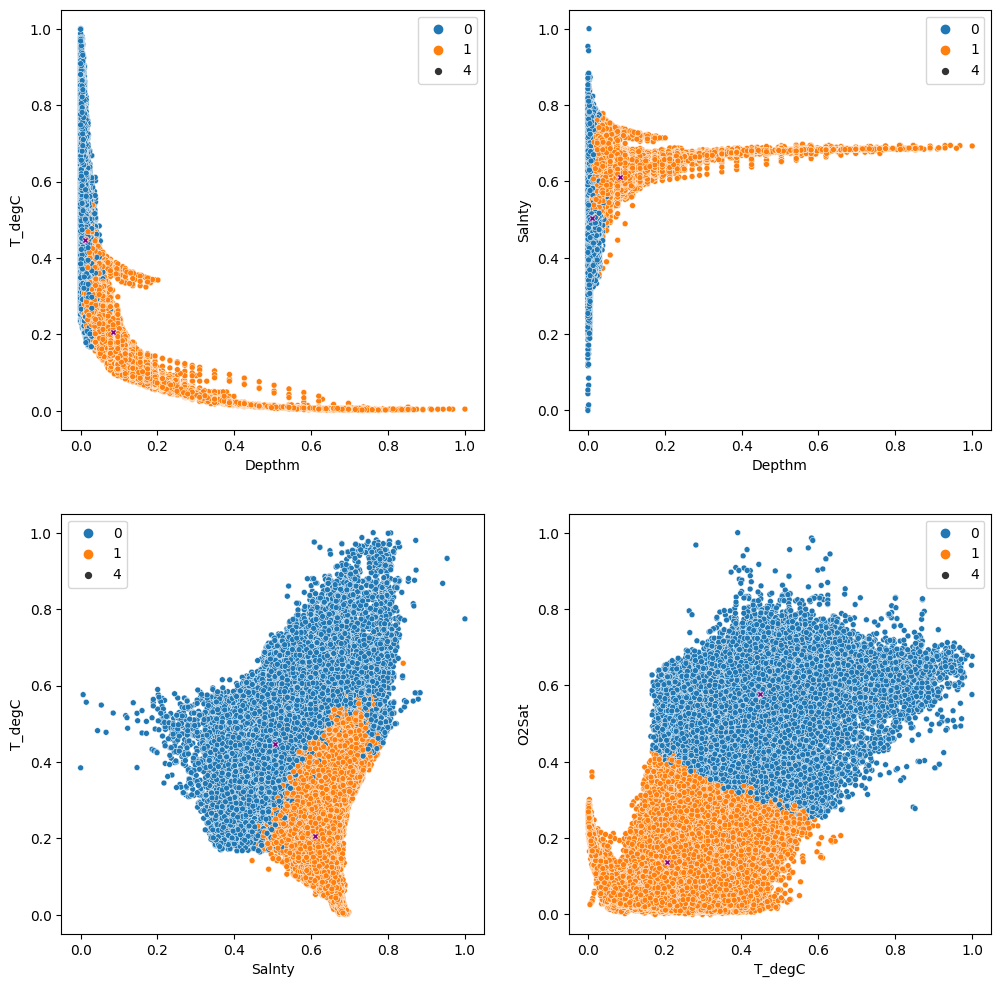

In [42]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Depthm'], hue = km_res, ax = ax[0, 0], size = 4)
sns.scatterplot(y = km.cluster_centers_[:, 1], x = km.cluster_centers_[:, 0], s=20, legend=False, marker = 'X', ax = ax[0,0], color = 'purple')

sns.scatterplot(y = x_test_data['Salnty'], x = x_test_data['Depthm'], hue = km_res, ax = ax[0, 1], size = 4)
sns.scatterplot(y = km.cluster_centers_[:, 2], x = km.cluster_centers_[:, 0], s=20, legend=False, marker = 'X', ax = ax[0,1], color = 'purple')

sns.scatterplot(y = x_test_data['T_degC'], x = x_test_data['Salnty'], hue = km_res, ax = ax[1, 0], size = 4)
sns.scatterplot(y = km.cluster_centers_[:, 1], x = km.cluster_centers_[:, 2], s=20, legend=False, marker = 'X', ax = ax[1,0], color = 'purple')

sns.scatterplot(y = x_test_data['O2Sat'], x = x_test_data['T_degC'], hue = km_res, ax = ax[1, 1], size = 4)
sns.scatterplot(y = km.cluster_centers_[:, 3], x = km.cluster_centers_[:, 1], s=20, legend=False, marker = 'X', ax = ax[1,1], color = 'purple')

<Axes: xlabel='T_degC', ylabel='O2Sat'>

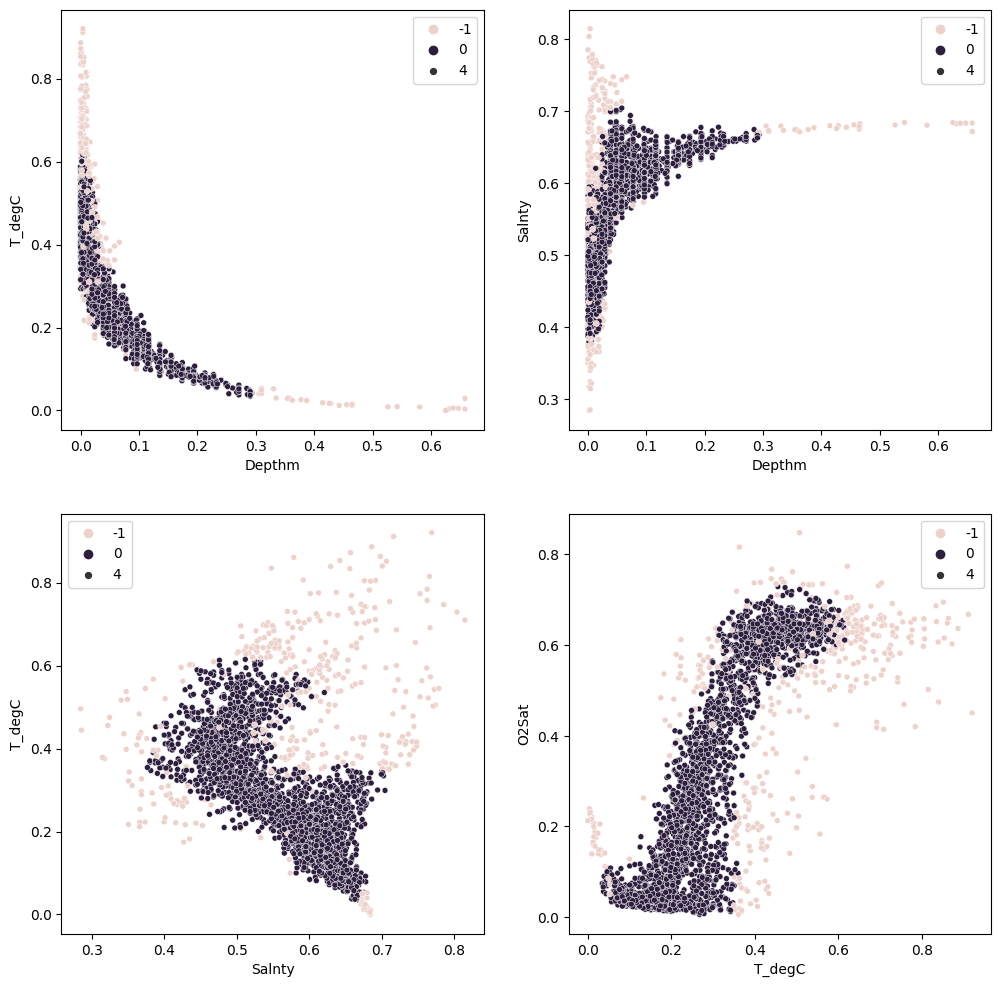

In [43]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
sns.scatterplot(y = x_training_data['T_degC'], x = x_training_data['Depthm'], hue = dbs.labels_, ax = ax[0, 0], size = 4)
sns.scatterplot(y = x_training_data['Salnty'], x = x_training_data['Depthm'], hue = dbs.labels_, ax = ax[0, 1], size = 4)
sns.scatterplot(y = x_training_data['T_degC'], x = x_training_data['Salnty'], hue = dbs.labels_, ax = ax[1, 0], size = 4)
sns.scatterplot(y = x_training_data['O2Sat'], x = x_training_data['T_degC'], hue = dbs.labels_, ax = ax[1, 1], size = 4)

<Axes: xlabel='T_degC', ylabel='O2Sat'>

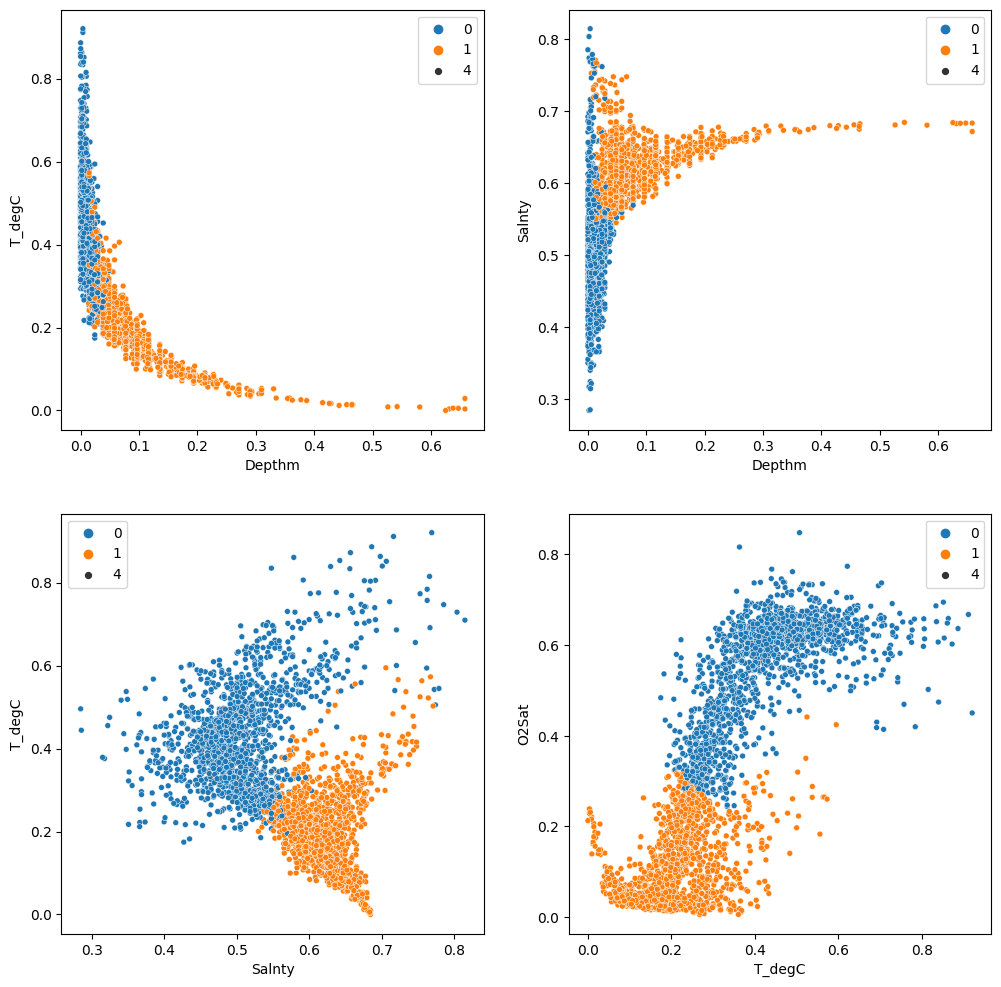

In [37]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
sns.scatterplot(y = x_training_data['T_degC'], x = x_training_data['Depthm'], hue = ag.labels_, ax = ax[0, 0], size = 4)
sns.scatterplot(y = x_training_data['Salnty'], x = x_training_data['Depthm'], hue = ag.labels_, ax = ax[0, 1], size = 4)
sns.scatterplot(y = x_training_data['T_degC'], x = x_training_data['Salnty'], hue = ag.labels_, ax = ax[1, 0], size = 4)
sns.scatterplot(y = x_training_data['O2Sat'], x = x_training_data['T_degC'], hue = ag.labels_, ax = ax[1, 1], size = 4)